<a href="https://colab.research.google.com/github/HuynhVietDung/churn-rate-prediction/blob/main/prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# 1. Load Data

In [ ]:
from google.colab import drive

def load_data():
  # Connecting to Google Drive
  drive.mount('/content/drive')

  # Path to the data file in Google Drive
  file_path = '/content/drive/MyDrive/Final/churn_rate_prediction.csv'

  # Read data
  df = pd.read_csv(file_path)
  return df

df = load_data()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,fffe4300490044003600300030003800,Pattie Morrisey,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,...,300.63,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,2
1,fffe43004900440032003100300035003700,Traci Peery,32,F,5K0N3X1,City,Premium Membership,2017-08-28,?,CID21329,...,306.34,12838.38,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care,1
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,F,1F2TCL3,Town,No Membership,2016-11-11,Yes,CID12313,...,516.16,21027.00,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,5
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,M,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,...,53.27,25239.56,6.0,567.66,No,Yes,Yes,Unsolved,Poor Website,5
4,fffe43004900440031003900350030003600,Meghan Kosak,31,F,SVZXCWB,City,No Membership,2017-09-12,No,xxxxxxxx,...,113.13,24483.66,16.0,663.06,No,Yes,Yes,Solved,Poor Website,5


# 2. Check Data Validation

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_id                   36992 non-null  object 
 1   Name                          36992 non-null  object 
 2   age                           36992 non-null  int64  
 3   gender                        36992 non-null  object 
 4   security_no                   36992 non-null  object 
 5   region_category               31564 non-null  object 
 6   membership_category           36992 non-null  object 
 7   joining_date                  36992 non-null  object 
 8   joined_through_referral       36992 non-null  object 
 9   referral_id                   36992 non-null  object 
 10  preferred_offer_types         36704 non-null  object 
 11  medium_of_operation           36992 non-null  object 
 12  internet_option               36992 non-null  object 
 13  l

In [ ]:
## unique values of each columns
for col in df.columns:
  print('{} has {} unique values.'.format(col, df[col].nunique()))

customer_id has 36992 unique values.
Name has 36992 unique values.
age has 55 unique values.
gender has 3 unique values.
security_no has 36992 unique values.
region_category has 3 unique values.
membership_category has 6 unique values.
joining_date has 1096 unique values.
joined_through_referral has 3 unique values.
referral_id has 11359 unique values.
preferred_offer_types has 3 unique values.
medium_of_operation has 4 unique values.
internet_option has 3 unique values.
last_visit_time has 30101 unique values.
days_since_last_login has 27 unique values.
avg_time_spent has 25961 unique values.
avg_transaction_value has 36894 unique values.
avg_frequency_login_days has 1654 unique values.
points_in_wallet has 23699 unique values.
used_special_discount has 2 unique values.
offer_application_preference has 2 unique values.
past_complaint has 2 unique values.
complaint_status has 5 unique values.
feedback has 9 unique values.
churn_risk_score has 6 unique values.


## Categorical Features

In [ ]:
# In this case, categorical columns have <= 9 unique values
cat_col = []
for column_name in df.columns:
    unique_values = len(df[column_name].unique())
    if unique_values <= 9:
        cat_col.append(column_name)

### Check NULL values of Categorical Features

In [ ]:
# Amount of null values
for column_name in cat_col:
    null_values = df[column_name].isnull().sum()
    print("'{column_name}' has '{null_values}' null values".format(column_name = column_name,
                                                                                         null_values=null_values))

'gender' has '0' null values
'region_category' has '5428' null values
'membership_category' has '0' null values
'joined_through_referral' has '0' null values
'preferred_offer_types' has '288' null values
'medium_of_operation' has '0' null values
'internet_option' has '0' null values
'used_special_discount' has '0' null values
'offer_application_preference' has '0' null values
'past_complaint' has '0' null values
'complaint_status' has '0' null values
'feedback' has '0' null values
'churn_risk_score' has '0' null values


### Plot categorical features to find error data

<Axes: xlabel='count', ylabel='churn_risk_score'>

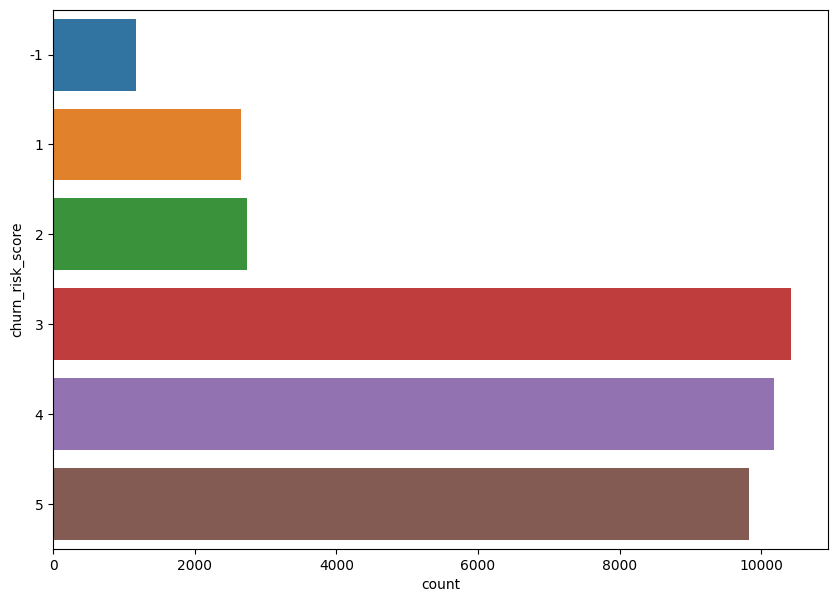

In [ ]:
### Target column
plt.figure(figsize = (10,7))
sns.countplot(y = 'churn_risk_score'  , data = df)

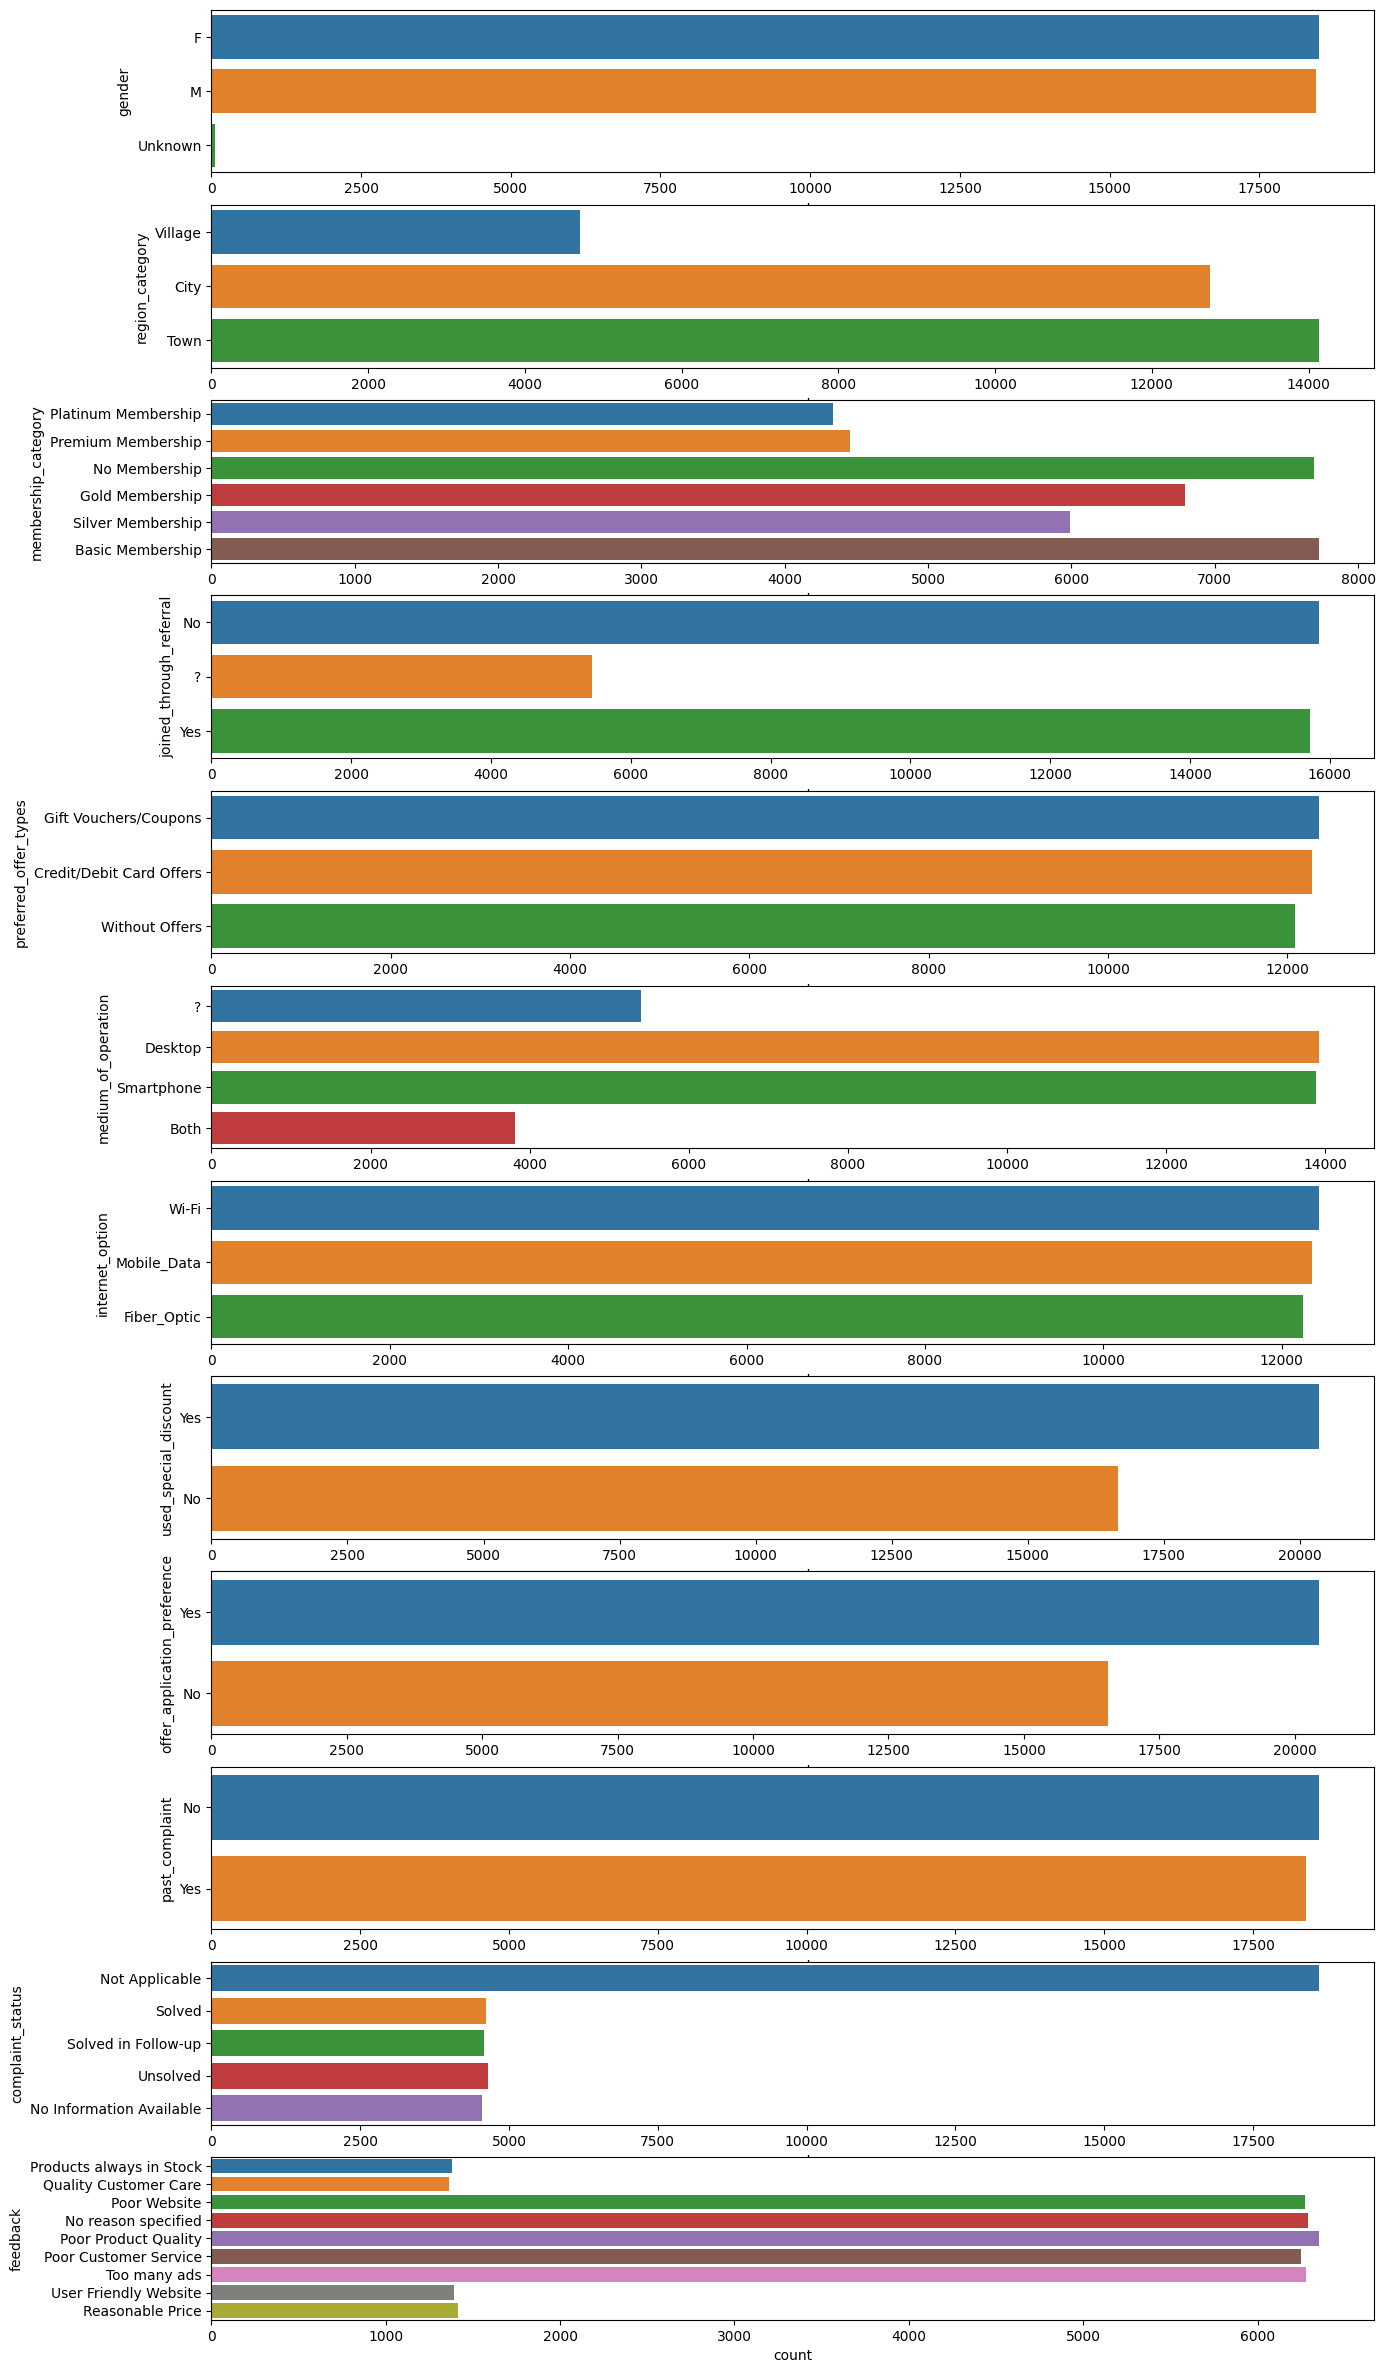

In [ ]:
### orthers columns
i = 1
plt.figure(figsize = (15,30))
for feature in cat_col[:-1]:
    plt.subplot(12,1,i)
    sns.countplot(y = feature , data = df)
    i +=1

### Features with undefined values
- "Region_category" has NULL values

- "Medium_of_operation" has "?" symbols

- "Joined_through_referral" has "?" symbols

  ⟹ Convert all these values to "Unknown"
- "churn_risk_score" has a value of '-1' replaced by '3'
- In addition, "Referral_id" has undefined values 'xxxxx'. However, this column will be dropped.

## Non-Categorical Features

In [ ]:
other = [x for x in df.columns if x not in cat_col]
other

['customer_id',
 'Name',
 'age',
 'security_no',
 'joining_date',
 'referral_id',
 'last_visit_time',
 'days_since_last_login',
 'avg_time_spent',
 'avg_transaction_value',
 'avg_frequency_login_days',
 'points_in_wallet']

### Check Null values of non-categorical features

In [ ]:
for column_name in other:
    null_values = df[column_name].isnull().sum()
    print("'{column_name}' has '{null_values}' null values".format(column_name = column_name,
                                                                                         null_values=null_values))

'customer_id' has '0' null values
'Name' has '0' null values
'age' has '0' null values
'security_no' has '0' null values
'joining_date' has '0' null values
'referral_id' has '0' null values
'last_visit_time' has '0' null values
'days_since_last_login' has '0' null values
'avg_time_spent' has '0' null values
'avg_transaction_value' has '0' null values
'avg_frequency_login_days' has '0' null values
'points_in_wallet' has '3443' null values


### Features with undefined values
- "Days_since_last_login" has a value of -999

- "avg_frequency_login_days" has "Error" values and negative values

- "Avg_time_spent" has negative values

- "points_in_wallet" has empty values and negative values

⟹ Convert all these values to np.nan

# 3. Data Preprocessing

In [ ]:
def replace_incorrect_data(df):
  # Replace the incorrect data in categorical features by the value "Unknown"
  df['gender'] =  df['gender'].apply(lambda x: 'Unknown' if pd.isnull(x) else x)
  df['joined_through_referral'] =  df['joined_through_referral'].apply(lambda x: 'Unknown' if x == '?' or pd.isnull(x) else x)
  df['medium_of_operation'] =  df['medium_of_operation'].apply(lambda x: 'Unknown' if x == '?' or pd.isnull(x) else x)
  df['region_category'] = df['region_category'].apply(lambda x: 'Unknown' if pd.isnull(x) else x )

  # replace incorrect data with null value
  df['points_in_wallet'] = df['points_in_wallet'].apply(lambda x: np.nan if x < 0 else x)
  df['days_since_last_login'] = df['days_since_last_login'].apply(lambda x: np.nan if x < 0 else x)
  df['avg_frequency_login_days'] = df['avg_frequency_login_days'].apply(lambda x: np.nan if x == 'Error' or (x != 'Error' and float(x) < 0)  else x)
  df['avg_time_spent'] = df['avg_time_spent'].apply(lambda x: np.nan if x < 0 else x)
  df['churn_risk_score'] =  df['churn_risk_score'].apply(lambda x: 3 if x == -1  else x)
  return df


In [ ]:
def features_selection(df):
  drop_list =['Name','customer_id','Name','security_no','joining_date','last_visit_time','referral_id']
  df.drop(drop_list, axis = 1, inplace =True)
  return df

In [ ]:
def convert_categorical_to_numerical(df):
    df['avg_frequency_login_days'] = df['avg_frequency_login_days'].astype(float)
    for col in df.columns:
        if df[col].dtype == 'object':
            df[col] = df[col].astype('category').cat.codes
    return df

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Replace NULL data with prediction model
def fill_missing_values(df):

  # Using IterativeImputer to fill missing values
  imputer = IterativeImputer(max_iter = 100,random_state = 42)
  imputed_data = imputer.fit_transform(df)

  # Create a new DataFrame from imputed data
  data_imputed = pd.DataFrame(imputed_data, columns= df.columns)
  return data_imputed

In [ ]:
from scipy import stats

def remove_outliers(df):
  z_scores = stats.zscore(df)
  threshold = 3  # Adjust the threshold as needed
  data_iqr = df[(z_scores < threshold).all(axis=1)]
  return data_iqr

In [ ]:
def preprocessing_data(df):
  # Drop unnecessary columns
  df = features_selection(df)

  # Replace incorrect data
  df = replace_incorrect_data(df)

  # Normalize data
  df = convert_categorical_to_numerical(df)

  # Fill missing values
  df = fill_missing_values(df)

  # remove outlier
  df = remove_outliers(df)
  return df

data_imputed = preprocessing_data(df.copy())
data_imputed.head()

,age,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,18.0,0.0,3.0,3.0,0.0,1.0,3.0,2.0,17.0,300.63,53005.25,17.0,781.750000,1.0,1.0,0.0,1.0,4.0,2.0
1,32.0,0.0,0.0,4.0,1.0,1.0,1.0,1.0,16.0,306.34,12838.38,10.0,837.450372,1.0,0.0,1.0,2.0,5.0,1.0
2,44.0,0.0,1.0,2.0,2.0,1.0,1.0,2.0,14.0,516.16,21027.00,22.0,500.690000,0.0,1.0,1.0,3.0,3.0,5.0
3,37.0,1.0,0.0,2.0,2.0,1.0,1.0,1.0,11.0,53.27,25239.56,6.0,567.660000,0.0,1.0,1.0,4.0,3.0,5.0
4,31.0,0.0,0.0,2.0,0.0,0.0,2.0,1.0,20.0,113.13,24483.66,16.0,663.060000,0.0,1.0,1.0,2.0,3.0,5.0


In [ ]:
data_imputed.shape

(34676, 19)

# 4. Data Analyst

### Heatmap

<Axes: >

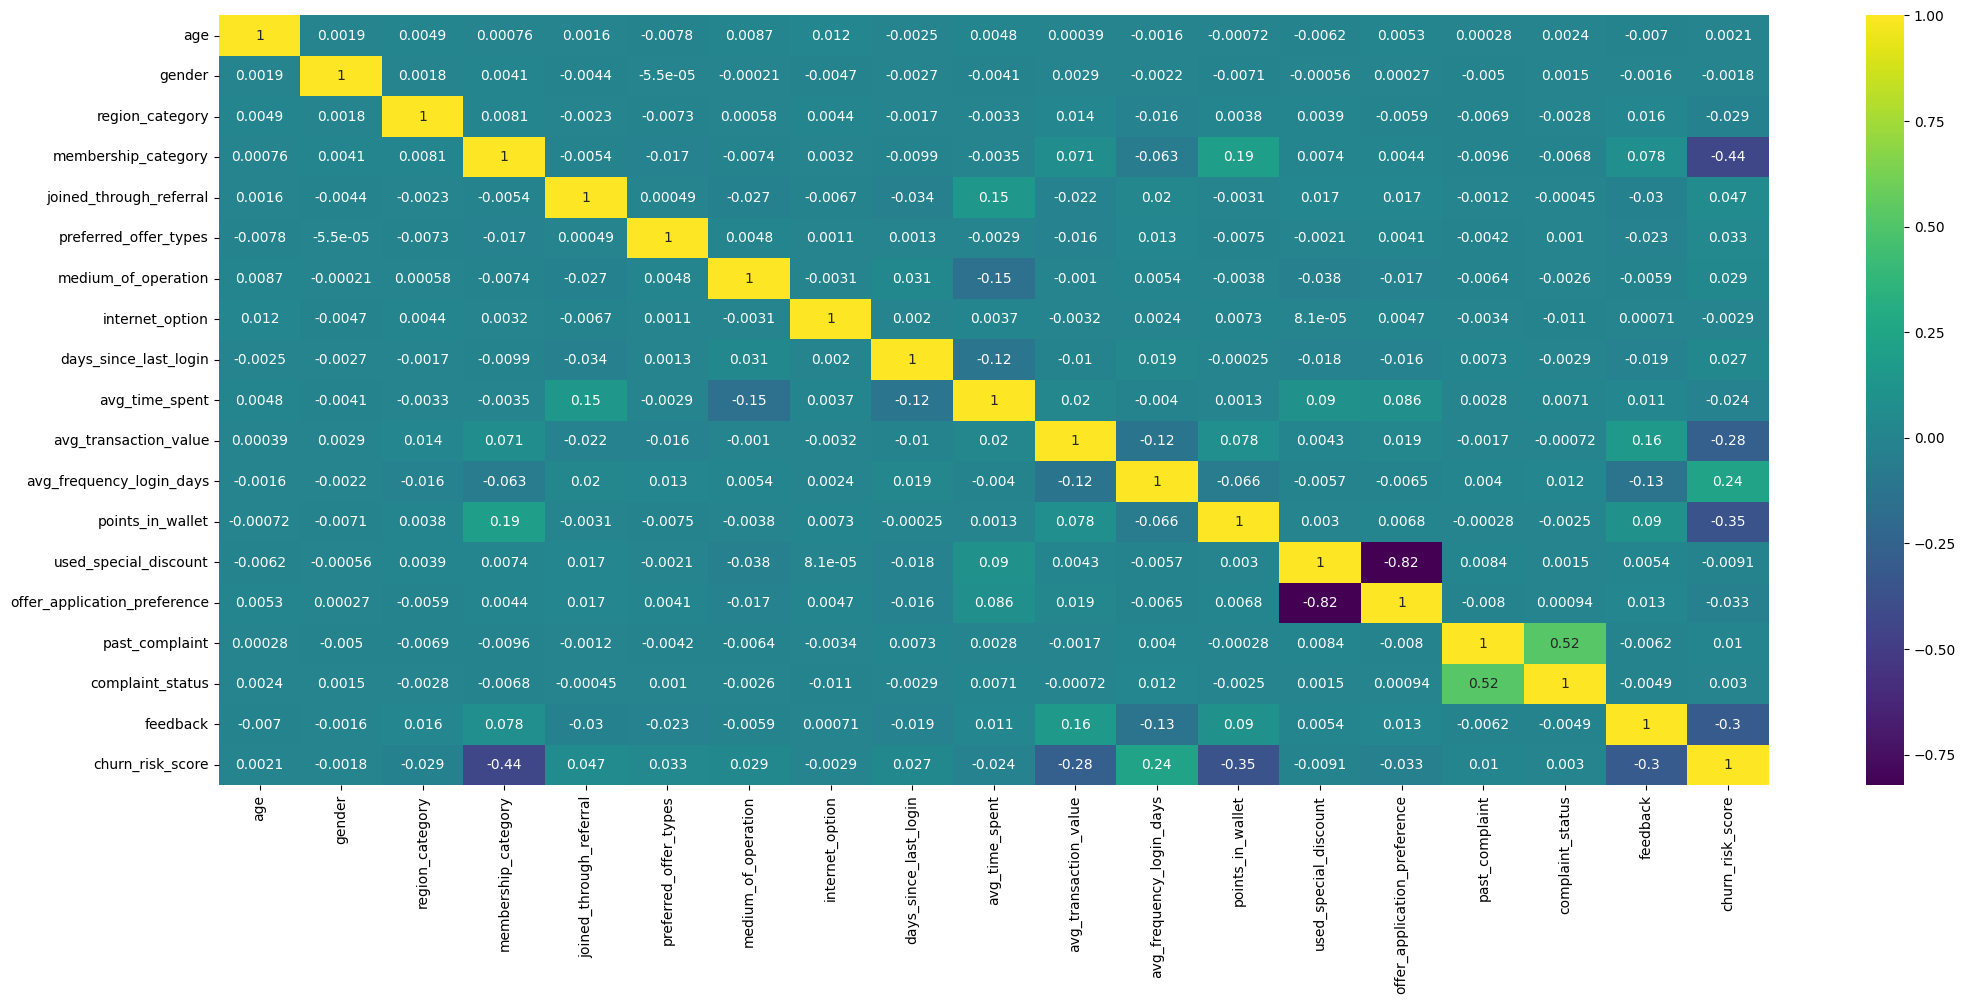

In [ ]:
plt.figure(figsize=(25,10))
sns.heatmap(data_imputed.corr(),annot = True, cmap ='viridis')

In [ ]:
data_imputed.describe()

,age,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
count,34676.000000,34676.000000,34676.000000,34676.000000,34676.000000,34676.000000,34676.000000,34676.000000,34676.000000,34676.000000,34676.000000,34676.000000,34676.000000,34676.000000,34676.000000,34676.000000,34676.000000,34676.000000,34676.000000
mean,37.135771,0.502682,1.054072,2.219258,0.992185,0.981688,1.571058,1.006316,12.807894,263.321634,27961.868581,16.320416,680.790306,0.547295,0.549977,0.496568,1.625043,3.012833,3.636867
std,15.864428,0.503334,0.995818,1.739734,0.923472,0.830795,0.857049,0.816478,5.417496,262.448768,17351.315727,7.249476,163.128100,0.497765,0.497503,0.499995,1.217190,2.547540,1.133401
min,10.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,1.000000,1.837399,800.460000,0.009208,6.432208,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,23.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,9.000000,73.450000,13860.512500,11.000000,616.727500,0.000000,0.000000,0.000000,1.000000,1.000000,3.000000
50%,37.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,13.000000,177.740000,26963.390000,16.160462,691.865000,1.000000,1.000000,0.000000,1.000000,2.000000,4.000000
75%,51.000000,1.000000,2.000000,4.000000,2.000000,2.000000,2.000000,2.000000,16.000000,345.210000,40025.280000,22.000000,755.760000,1.000000,1.000000,1.000000,2.000000,5.000000,5.000000
max,64.000000,2.000000,3.000000,5.000000,2.000000,2.000000,3.000000,2.000000,26.000000,1266.759622,87593.490000,40.303456,1224.731284,1.000000,1.000000,1.000000,4.000000,8.000000,5.000000


In [ ]:
data_imputed['churn_risk_score'].unique()

array([2., 1., 5., 3., 4.])

In [ ]:
# Check null values again
data_imputed.isnull().sum()

age                             0
gender                          0
region_category                 0
membership_category             0
joined_through_referral         0
preferred_offer_types           0
medium_of_operation             0
internet_option                 0
days_since_last_login           0
avg_time_spent                  0
avg_transaction_value           0
avg_frequency_login_days        0
points_in_wallet                0
used_special_discount           0
offer_application_preference    0
past_complaint                  0
complaint_status                0
feedback                        0
churn_risk_score                0
dtype: int64

<Axes: xlabel='count', ylabel='feedback'>

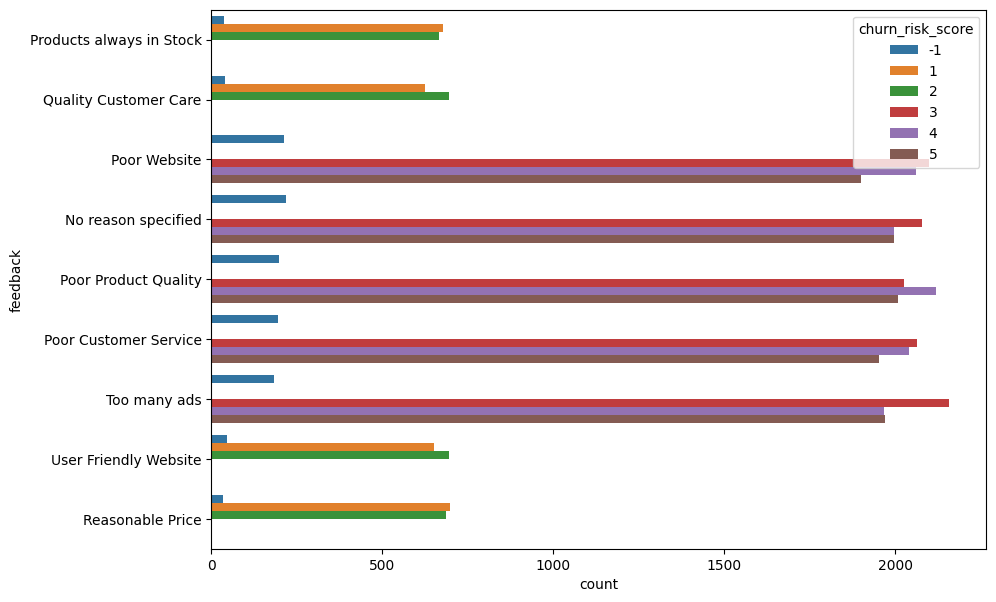

In [ ]:
### Feedback theo Churn_risk_score
plt.figure(figsize = (10,7))
sns.countplot(hue = 'churn_risk_score' , y = 'feedback' , data = df)

### Box plot

In [ ]:
num_col = [x for x in data_imputed.columns if data_imputed[x].nunique() > 9]
num_col

['age',
 'days_since_last_login',
 'avg_time_spent',
 'avg_transaction_value',
 'avg_frequency_login_days',
 'points_in_wallet']

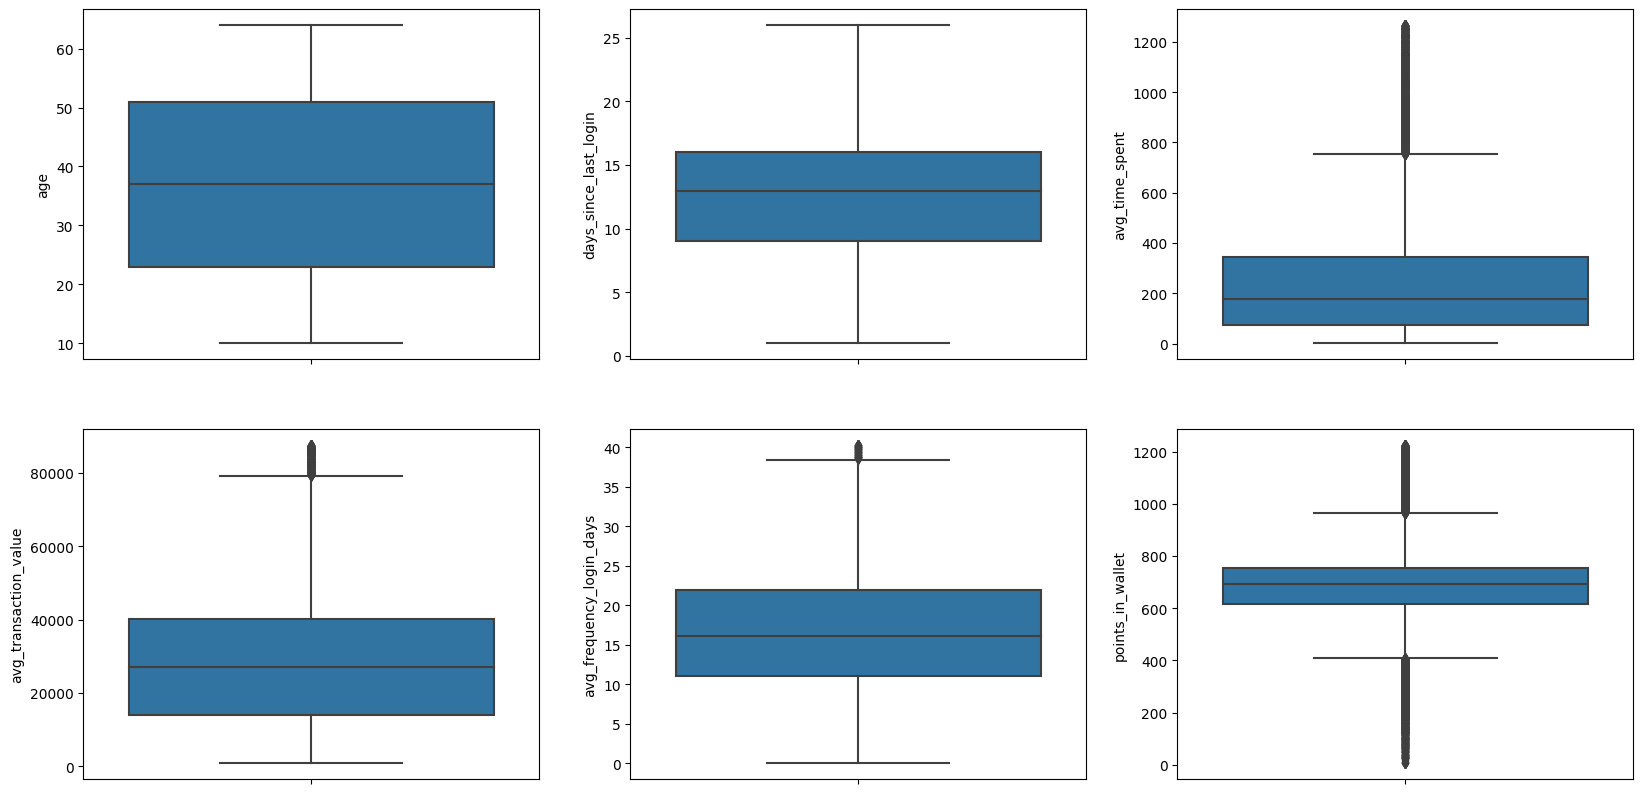

In [ ]:
i=1
plt.figure(figsize=(20,10))
for feature in num_col:
    plt.subplot(2,3,i)
    sns.boxplot(y= data_imputed[feature])
    i+=1

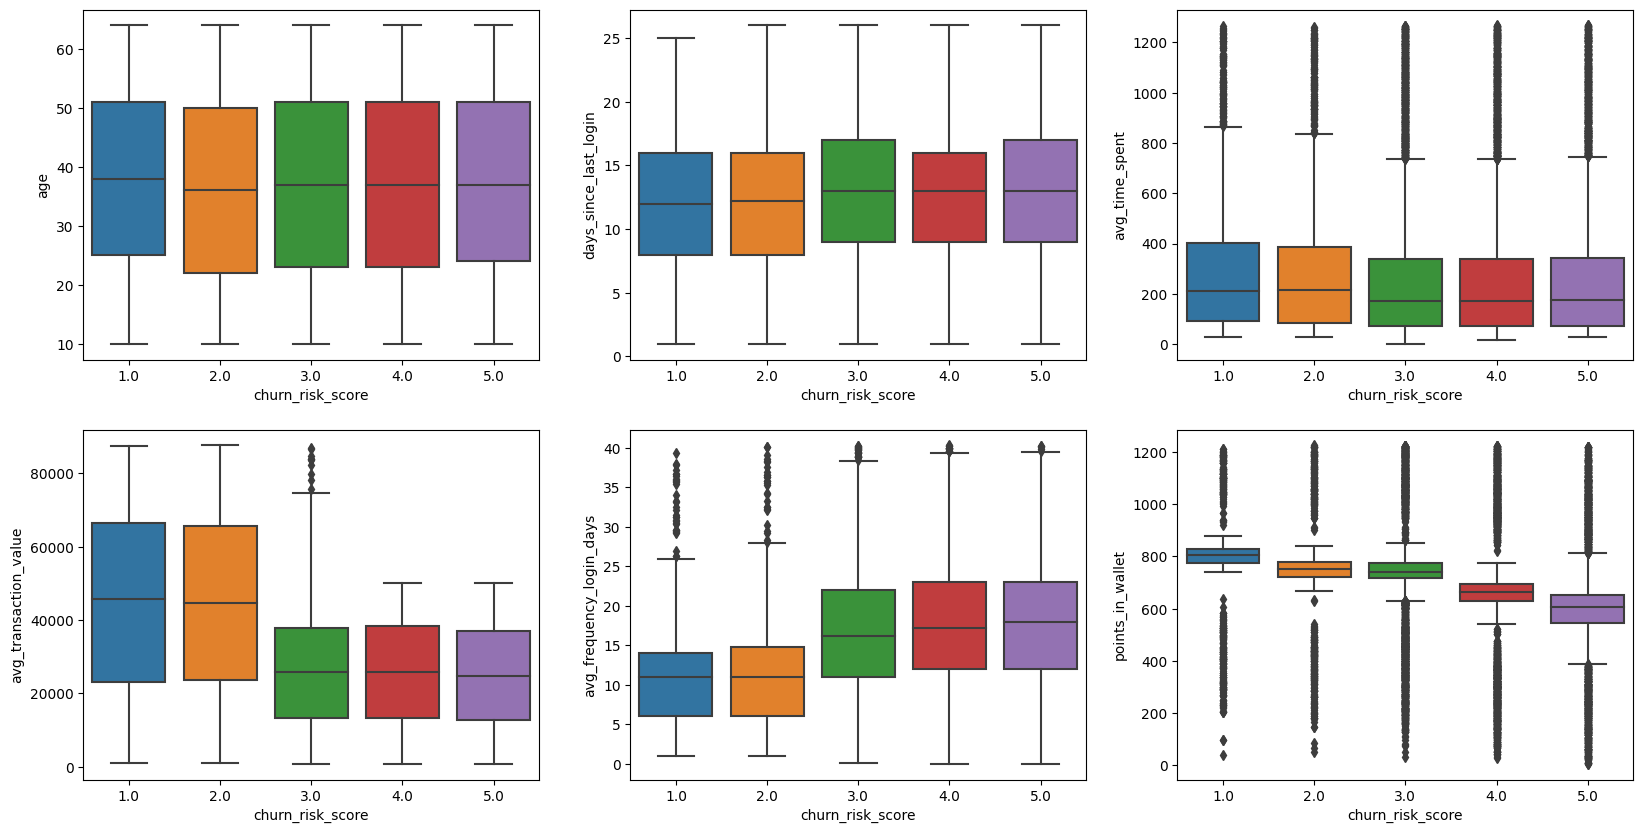

In [ ]:
i=1
plt.figure(figsize=(20,10))
for feature in num_col:
    plt.subplot(2,3,i)
    sns.boxplot(x = data_imputed['churn_risk_score'], y= data_imputed[feature])
    i+=1

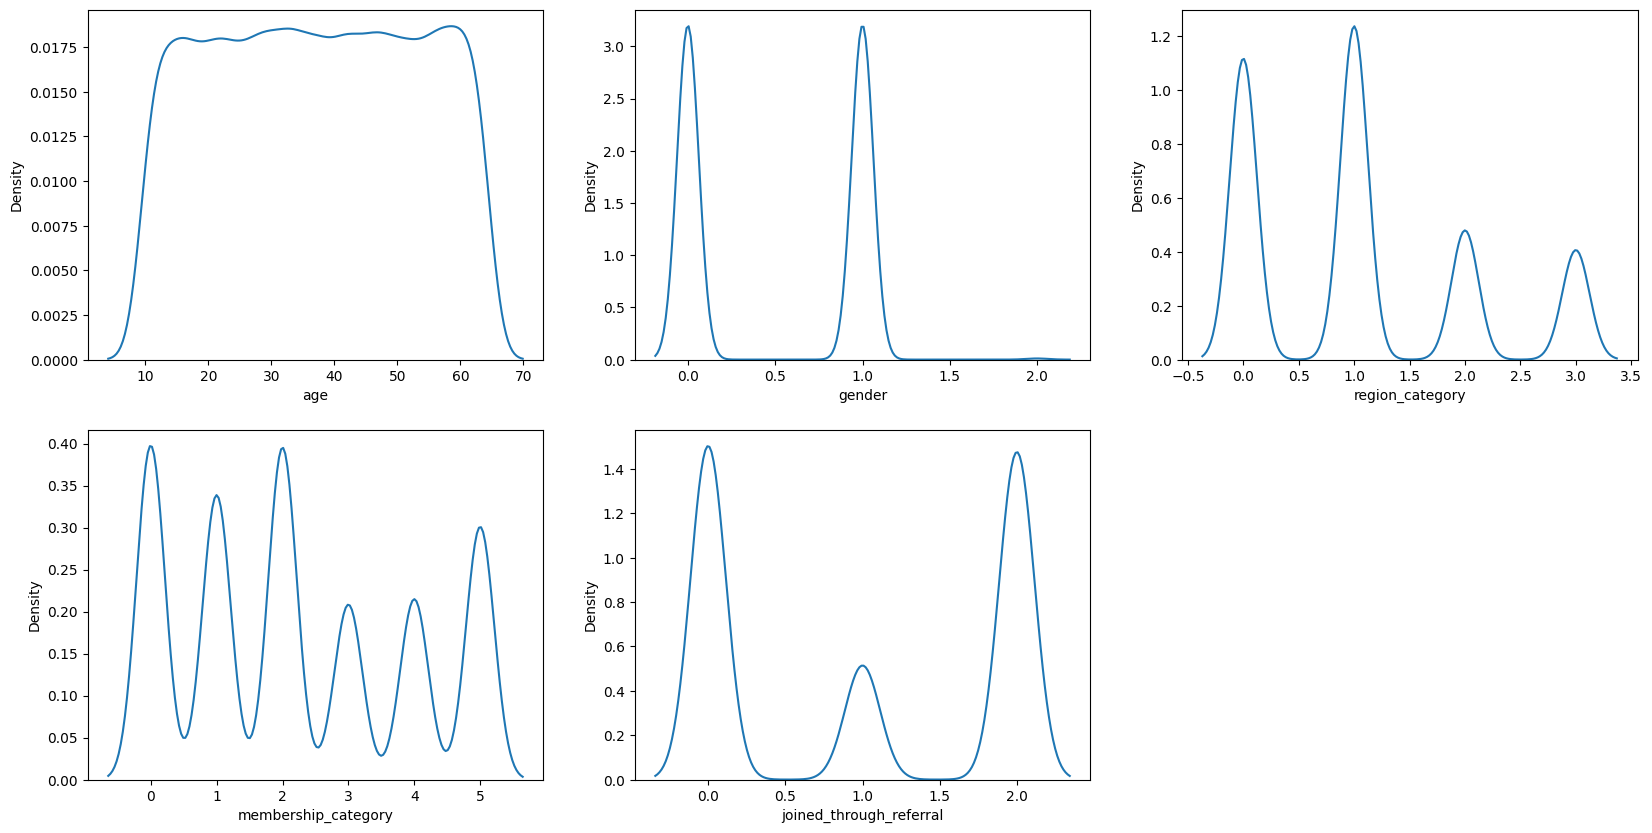

In [ ]:
data_num = data_imputed.drop('churn_risk_score', axis=1).select_dtypes(include=[np.number])
fig,ax= plt.subplots(nrows=2,ncols=3,figsize=(20,10))
for variable, subplot in zip(data_num.columns,ax.flatten()):
    z = sns.kdeplot(x = data_num[variable] , ax=subplot)
    z.set_xlabel(variable, fontsize = 10)

fig.delaxes(ax[1][2])
plt.show()

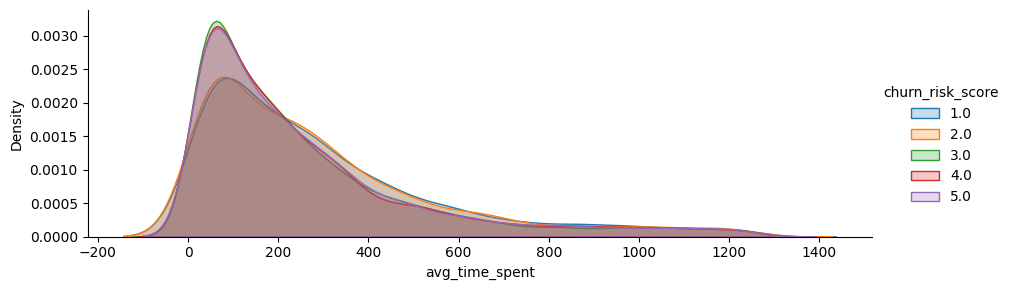

In [ ]:
facet = sns.FacetGrid(data_imputed, hue = "churn_risk_score", aspect = 3)
facet.map(sns.kdeplot,"avg_time_spent",shade= True)
facet.add_legend()
plt.show()

# 5. Build Model

In [ ]:
df2 = data_imputed[['membership_category','region_category','points_in_wallet','feedback','churn_risk_score']]

## Split Data

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = df2.drop(columns = 'churn_risk_score').values
y = df2['churn_risk_score'].values
X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(X, y, test_size=.2, random_state=1)

## Build SVM Model

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline

def Build_model(X_train, y_train):
    # Khởi tạo pipeline
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=4)),
        ('svm', SVC(kernel='rbf',random_state = 1))
    ])

    # Huấn luyện pipeline trên dữ liệu huấn luyện
    model = pipe.fit(X_train, y_train)
    return model
SVM_Model = Build_model(X_train_svm,y_train_svm)

## Evaluate Model

accuracy 0.7507208765859285
precision 0.7370438447922767
recall 0.7162790350090866
F1 0.7238917397577115
Classification Report
               precision    recall  f1-score   support

         1.0       0.69      0.72      0.71       424
         2.0       0.74      0.57      0.65       453
         3.0       0.84      0.84      0.84      2231
         4.0       0.69      0.66      0.68      1943
         5.0       0.72      0.79      0.75      1885

    accuracy                           0.75      6936
   macro avg       0.74      0.72      0.72      6936
weighted avg       0.75      0.75      0.75      6936



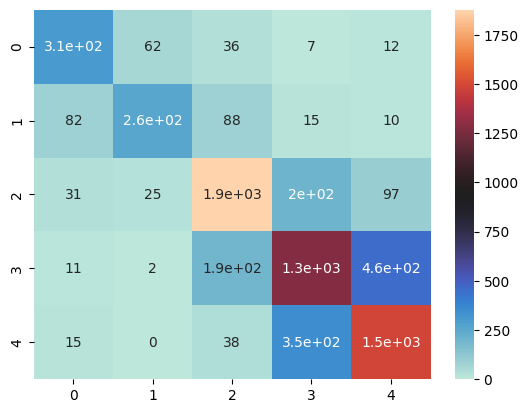

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report,confusion_matrix,roc_auc_score, accuracy_score
def evaluate_model(y_true, y_pred):
    print("accuracy", accuracy_score(y_true, y_pred))
    print("precision", precision_score(y_true, y_pred,average= 'macro'))
    print("recall", recall_score(y_true, y_pred,average= 'macro'))
    print("F1", f1_score(y_true, y_pred,average= 'macro'))

    report = classification_report(y_true, y_pred)
    print("Classification Report\n",report)

    cm = confusion_matrix(y_true,y_pred)
    sns.heatmap(cm , annot = True,cmap ='icefire')

# Sử dụng pipeline để dự đoán kết quả trên tập kiểm tra
y_pred = SVM_Model.predict(X_test_svm)
evaluate_model(y_test_svm , y_pred)

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(SVM_Model, X, y, cv=5)

print("Điểm số cross-validation: ", scores)
# Trung bình cộng các điểm số
print("Điểm số trung bình: ", scores.mean())

Điểm số cross-validation:  [0.73904268 0.73987022 0.7518385  0.74780101 0.74174477]
Điểm số trung bình:  0.7440594364044444


## Try another model

Kết quả dự đoán:  [3. 5. 5. ... 5. 5. 3.]
accuracy 0.7707612456747405
precision 0.757836952486869
recall 0.75868795156174
F1 0.758173985961385
Classification Report
               precision    recall  f1-score   support

         1.0       0.73      0.75      0.74       424
         2.0       0.75      0.74      0.74       453
         3.0       0.90      0.88      0.89      2231
         4.0       0.68      0.68      0.68      1943
         5.0       0.73      0.75      0.74      1885

    accuracy                           0.77      6936
   macro avg       0.76      0.76      0.76      6936
weighted avg       0.77      0.77      0.77      6936



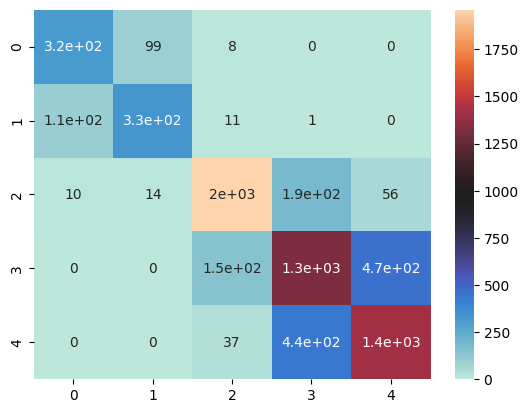

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
# Khởi tạo mô hình Random Forest
clf = RandomForestClassifier(n_estimators=100, random_state=1)

# Huấn luyện mô hình
clf.fit(X_train_svm, y_train_svm)

# Sử dụng mô hình để dự đoán tập kiểm tra
predictions = clf.predict(X_test_svm)

# In kết quả dự đoán
print("Kết quả dự đoán: ", predictions)
evaluate_model(y_test_svm , predictions)

In [ ]:
#Build a model with the entire dataset
SVM_Model_Full_Data = Build_model(X,y)

## Resample Data

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

data_iqr = data_imputed.copy()
X = data_iqr.drop(columns = 'churn_risk_score').values
y = data_iqr['churn_risk_score'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=1)

In [ ]:
def size(y_train):
    y_train_series = pd.Series(y_train)
    counts = y_train_series.value_counts()
    print(counts)
size(y_train)

3.0    6541
4.0    5858
5.0    5741
2.0    1352
1.0    1313
dtype: int64


# Deal Imbalance

In [ ]:
import numpy as np
from sklearn.utils import resample

def handle_imbalance(X_train, y_train):
    # Tỉ lệ undersampling cho từng nhãn
    undersample_ratios = {
        3.0: 0.7,
        4.0: 0.75,
        5.0: 0.8,
        2.0: 2,
        1.0: 2
    }

    # Chuyển đổi y_train thành mảng numpy
    y_train_np = np.array(y_train)

    # Tạo danh sách các nhãn duy nhất
    unique_labels = np.unique(y_train_np)

    # Khởi tạo danh sách lưu trữ dữ liệu sau khi xử lý mất cân bằng
    X_train_balanced = []
    y_train_balanced = []

    # Undersampling và Oversampling
    for label in unique_labels:
        # Lấy các mẫu có nhãn cụ thể
        label_samples = X_train[y_train_np == label]

        # Xác định số lượng mẫu cần undersampling hoặc oversampling
        target_count = int(len(label_samples) * undersample_ratios[label])

        if target_count < len(label_samples):
            # Undersampling
            undersampled_samples = resample(label_samples, n_samples=target_count, replace=False, random_state=42)
            X_train_balanced.extend(undersampled_samples)
            y_train_balanced.extend([label] * target_count)
        else:
            # Oversampling
            oversampled_samples = resample(label_samples, n_samples=target_count, replace=True, random_state=42)
            X_train_balanced.extend(oversampled_samples)
            y_train_balanced.extend([label] * target_count)

    # Chuyển đổi danh sách thành mảng numpy
    X_train_balanced = np.array(X_train_balanced)
    y_train_balanced = np.array(y_train_balanced)

    return X_train_balanced, y_train_balanced
X_train_balanced, y_train_balanced= handle_imbalance(X_train, y_train)

In [ ]:
size(y_train_balanced)

5.0    4592
3.0    4578
4.0    4393
2.0    2704
1.0    2626
dtype: int64


### SVM Model

### Runtime with different kernals

In [ ]:
def svm_predict(X_resampled, y_resampled, X_test, y_test, k, kernel):
    # Tạo pipeline với RobustScaler, PCA và SVC
    pipe = Pipeline([
        ('scaler', RobustScaler()),
        ('pca', PCA(n_components=k)),
        ('svm', SVC(kernel=kernel, random_state=1))
    ])

    # Huấn luyện mô hình trên tập huấn luyện
    pipe.fit(X_resampled, y_resampled)

    # Dự đoán nhãn cho tập huấn luyện và tập kiểm tra
    y_train_pred = pipe.predict(X_resampled)
    y_test_pred = pipe.predict(X_test)

    # Tính toán các độ đo
    train_report = classification_report(y_resampled, y_train_pred)
    test_report = classification_report(y_test, y_test_pred)

    # In kết quả các độ đo
    print("Train Classification Report:")
    print(train_report)
    print("Test Classification Report:")
    print(test_report)

    return train_report, test_report

In [ ]:
#With k=5
import time
kernels = ['rbf', 'linear', 'poly']
k=5
for kernel in kernels:
    print("Kernel:", kernel)

    start_time = time.time()

    svm_predict(X_train_balanced, y_train_balanced, X_test, y_test, k, kernel)

    end_time = time.time()
    execution_time = end_time - start_time

    print("Execution Time:", execution_time, "seconds")
    print("-----------------------------")


Kernel: rbf
Train Classification Report:
              precision    recall  f1-score   support

         1.0       0.66      0.64      0.65      2626
         2.0       0.63      0.50      0.56      2704
         3.0       0.61      0.74      0.67      4578
         4.0       0.63      0.62      0.62      4393
         5.0       0.68      0.65      0.67      4592

    accuracy                           0.64     18893
   macro avg       0.64      0.63      0.63     18893
weighted avg       0.64      0.64      0.64     18893

Test Classification Report:
              precision    recall  f1-score   support

         1.0       0.45      0.60      0.51       861
         2.0       0.42      0.43      0.43       919
         3.0       0.72      0.72      0.72      4456
         4.0       0.62      0.60      0.61      3907
         5.0       0.66      0.63      0.65      3728

    accuracy                           0.64     13871
   macro avg       0.57      0.60      0.58     13871
weighted

# kernel RBF achieves the best results

# GridSearchcv

Best Parameters: {'pca__n_components': 5, 'svm__C': 10, 'svm__kernel': 'rbf'}
Best Score: 0.6284120518093766
Classification Report:
              precision    recall  f1-score   support

         1.0       0.71      0.71      0.71      2626
         2.0       0.68      0.53      0.60      2704
         3.0       0.65      0.73      0.69      4578
         4.0       0.61      0.66      0.64      4393
         5.0       0.71      0.65      0.68      4592

    accuracy                           0.67     18893
   macro avg       0.67      0.66      0.66     18893
weighted avg       0.67      0.67      0.66     18893

              precision    recall  f1-score   support

         1.0       0.47      0.61      0.53       861
         2.0       0.41      0.40      0.40       919
         3.0       0.74      0.71      0.72      4456
         4.0       0.60      0.63      0.61      3907
         5.0       0.68      0.63      0.65      3728

    accuracy                           0.64     13871

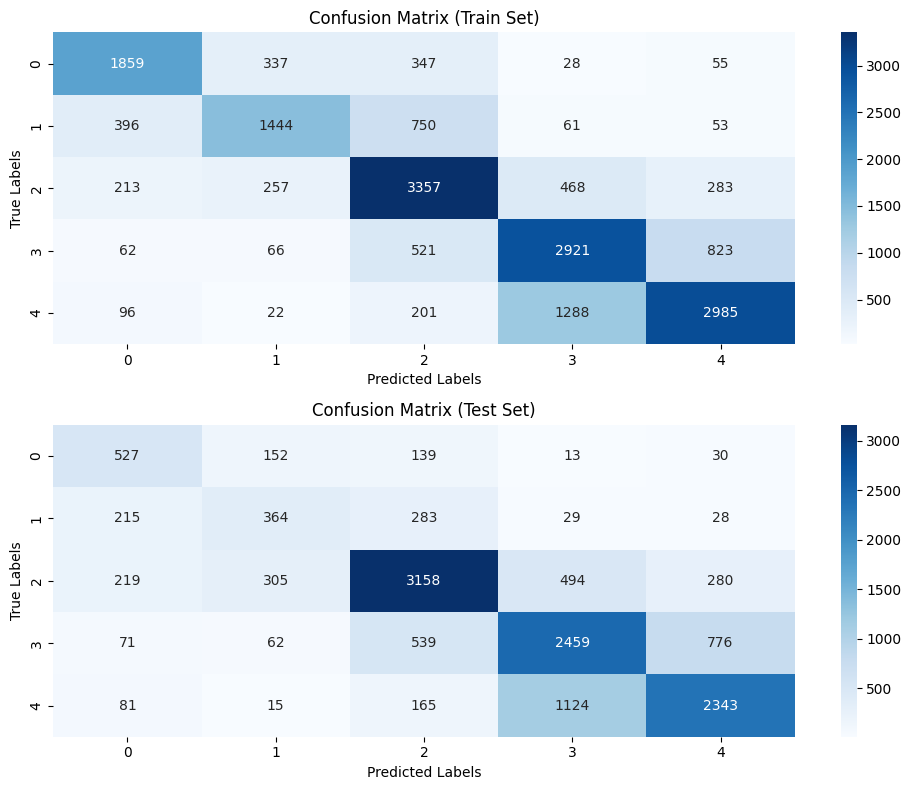

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.preprocessing import RobustScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
import time
from sklearn.metrics import classification_report, confusion_matrix
def svm_gridsearch(X_train, y_train, X_test, y_test):
    # Tạo pipeline với RobustScaler, PCA và SVC
    pipe = Pipeline([
        ('scaler', RobustScaler()),
        ('pca', PCA()),
        ('svm', SVC(random_state=1))
    ])

    # Định nghĩa các giá trị siêu tham số và khoảng tìm kiếm
    param_grid = {
        'pca__n_components': [5],
        'svm__kernel': ['rbf'],
        'svm__C': [0.1, 1, 10],
    }

    # Tạo GridSearchCV
    grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='f1_macro')

    # Huấn luyện và tìm kiếm siêu tham số tốt nhất
    grid_search.fit(X_train, y_train)

    # In kết quả tốt nhất và báo cáo
    print("Best Parameters:", grid_search.best_params_)
    print("Best Score:", grid_search.best_score_)
    print("Classification Report:")
    y_pred = grid_search.predict(X_test)
    y_train_pred = grid_search.predict(X_train)
    print(classification_report(y_train, y_train_pred))
    print(classification_report(y_test, y_pred))

        # In confusion matrix
    print("Confusion Matrix (Train Set):")
    cm_train = confusion_matrix(y_train, y_train_pred)
    print(cm_train)

    print("Confusion Matrix (Test Set):")
    cm_test = confusion_matrix(y_test, y_pred)
    print(cm_test)

    # Trực quan hóa ma trận nhầm lẫn (heatmap)
    plt.figure(figsize=(10, 8))
    plt.subplot(2, 1, 1)
    sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix (Train Set)')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')

    plt.subplot(2, 1, 2)
    sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix (Test Set)')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')

    plt.tight_layout()
    plt.show()
start_time = time.time()
svm_gridsearch(X_train_balanced, y_train_balanced, X_test, y_test)
end_time = time.time()
execution_time = end_time - start_time

print("Execution Time:", execution_time, "seconds")
print("-----------------------------")


Sau khi dùng GridSearchCV, kết quả cho ra giá trị tốt hơn

# 6. Discussion & Conclusion
## I. Xử lý dữ liệu
1. **Xử lý dữ liệu sai định dạng:** Chúng tôi đã sửa các lỗi định dạng dữ liệu, các cột
- Các dữ liệu bị sai trong cột "Medium_of_operation" , "Joined_through_referral" thành Unknown vì đây là các cột dạng phân loại.

- Các dữ liệu bị sai trong cột "Days_since_last_login" , "avg_frequency_login_days" chuyển thành NULL vì đây là các cột dạng số ta có thể chạy mô hình để dự đoán các giá trị bị sai sau khi chuyển các giá trị này thành NULL.
Bên cạnh đó "churn_risk_score" có giá trị là '-1' được thay bằng '3' vì giá trị -1 là không xác định và theo thống kê ở cột "feedback" ta thấy label "-1" xuất hiện ở tất cả các feedback xấu và tốt nên ta xếp chung với label trung lập 3.

2. **Xử lý dữ liệu bị rỗng:** Chúng tôi đã xác định các giá trị bị rỗng trong dữ liệu và tiến hành điền nó bằng các phương pháp ước lượng bằng mô hình IterativeImputer.

3. **Xử lý outliers:** Chúng tôi đã sử dụng phương pháp z_score để xác định và loại bỏ các outliers.

## II. Đánh giá mô hình

- Sau khi huấn luyện mô hình, chúng tôi đã sử dụng các thông số accuracy, precision, recall, f1_score, confusion matrix và cross-validation để đánh giá hiệu suất của mô hình. Kết quả cho thấy mô hình hoạt động khá tốt trên dữ liệu kiểm tra với kết quả f1_score là  trên 0.7.
- Ngoài ra, chúng tôi cũng thấy rằng mô hình có tập dữ liệu không cân đối giữa các label tuy nhiên kết quả dự đoán lại tương đối cân bằng ở các label.
-Đối với việc cân bằng dữ liệu. Thay vì sử dụng hoàn toàn SMOTE, undersampling hay oversampling thì lựa chọn giảm và tăng bằng undersampling, oversampling cho các nhãn phù hợp. Các tỷ lệ được chọn để không chênh lệch quá nhiều so với ban đầu.
- Khi thử nghiệm PCA với số chiều tìm được thông qua elbow, với số chiều thấp k < 4 thì mô hình không giữ được các thông tin dữ liệu từ lớp nhãn 2.  
- Giữa 3 loại kernel thường dùng là rbf, poly và linear thì rbf cho kết quả tốt nhất. Khi dùng GridSearchCV, kết quả được cải thiện.
- Đối với tất cả features, khi huấn luyện mô hình cho giá trị dự đoán 0.67 và 0.64 trên tập huấn luyện và thử nghiệm. Tuy kết quả không cao nhưng nhìn chung với precisionprecision, recallrecall, f1-scorescore, support cho kết quả không quá chênh lệch. Điều này cho thấy kết quả xử lý việc mất cân bằng ở các lớp hoạt động tốt.

## III. Kết luận
Quá trình xử lý dữ liệu đã hạn chế mất mát thông tin nhất có thể. Mặc dù chưa đạt hiệu quả cao nhất. Mô hình SVM đã cho kết quả khá tốt trên tập dữ liệu phức tạp. Tuy nhiên, vẫn còn một số vấn đề cần giải quyết như cần xử lý lại dữ liệu để tối ưu hơn, hiệu suất thấp trên một số lớp, xử lý mất cân bằng trên các lớp cần được xem xét qua các tỷ lệ. Chưa thử nghiệm đánh giá và so sánh hoàn toàn các kỹ thuật SMOTE, Oversampling, Undersampling.